### Problem 1: Linear Regression
#### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

#### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\gssprajd\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
gem_df = pd.read_csv("cubic_zirconia.csv") # read the dataset

In [3]:
gem_df.head() # First 5 records of the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
gem_df.info() # information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


Dataset contains 10 features. 6 features with float datatype, 3 with object datatype and 1 with integer datatype.

In [5]:
gem_df = gem_df.drop(gem_df.columns[0], axis = 1) # dropping the unnamed column which is of no use.

In [6]:
gem_df.shape

(26967, 10)

Dataset contains 26967 records and 10 features

In [7]:
gem_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Dataset contains 697 records with null value in the depth feature.

In [8]:
gem_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


* Dataset has missing values in depth feature.
* Mean & Median of the data are not close to each other so that could be skewness present.
* Min value of the feature x, y & z are 0 and by logic this cannot be possible since x, y & z represents length, width & height respectively.
* There are 5 types of cut, 7 colors & 8 types of clarity present in the dataset.
* Ideal cut, color G & clarity SI1 has a greater number of records.

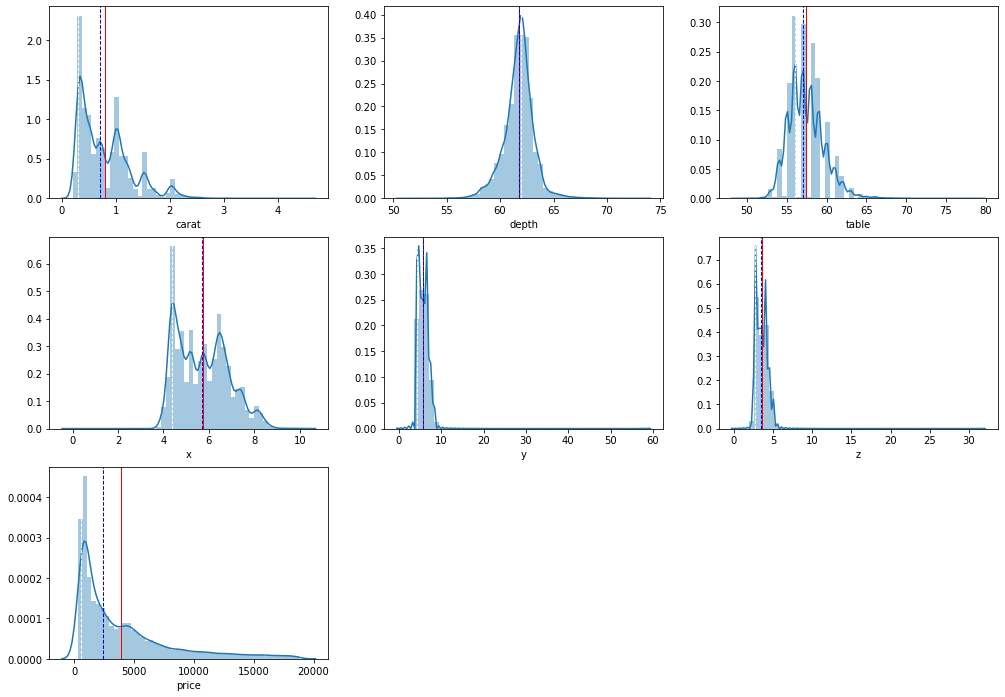

In [9]:
plt.figure(figsize = (17,12))
plt.subplot(3,3,1)
sns.distplot(gem_df['carat'])
plt.axvline(gem_df['carat'].mean(), color='red', linewidth=1)
plt.axvline(gem_df['carat'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(gem_df['carat'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(3,3,2)
sns.distplot(gem_df['depth'])
plt.axvline(gem_df['depth'].mean(), color='red', linewidth=1)
plt.axvline(gem_df['depth'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(gem_df['depth'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(3,3,3)
sns.distplot(gem_df['table'])
plt.axvline(gem_df['table'].mean(), color='red', linewidth=1)
plt.axvline(gem_df['table'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(gem_df['table'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(3,3,4)
sns.distplot(gem_df['x'])
plt.axvline(gem_df['x'].mean(), color='red', linewidth=1)
plt.axvline(gem_df['x'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(gem_df['x'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(3,3,5)
sns.distplot(gem_df['y'])
plt.axvline(gem_df['y'].mean(), color='red', linewidth=1)
plt.axvline(gem_df['y'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(gem_df['y'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(3,3,6)
sns.distplot(gem_df['z'])
plt.axvline(gem_df['z'].mean(), color='red', linewidth=1)
plt.axvline(gem_df['z'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(gem_df['z'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(3,3,7)
sns.distplot(gem_df['price'])
plt.axvline(gem_df['price'].mean(), color='red', linewidth=1)
plt.axvline(gem_df['price'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(gem_df['price'].mode()[0], color='white', linestyle='dashed', linewidth=1);

* Feature depth looks like normal distribution.
* Features carat, table, y, z are right skewed with multiple peaks.
* Mean & Median of the feature x is almost equal but the distribution has multiple peaks and the distribution is not normal.
* And feature price is right skewed distribution.
* Since it is EDA, all these inferences are just visual interpretation by looking at the distribution plot but the skewness & normality can be computed in other ways.

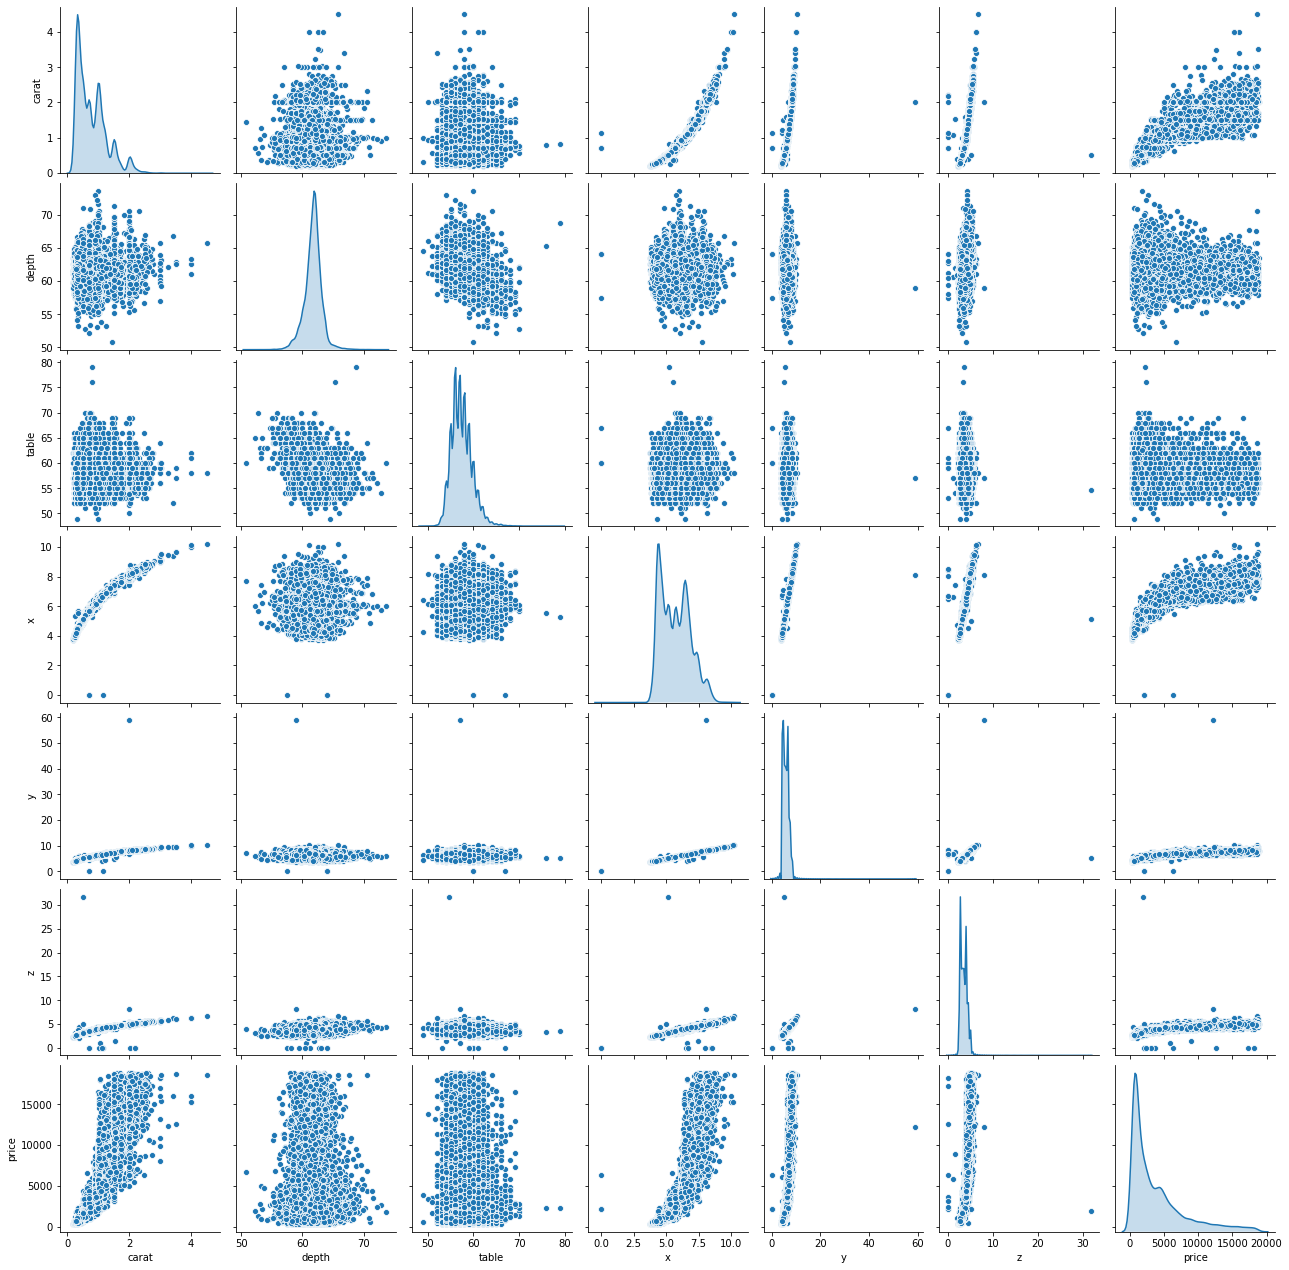

In [10]:
sns.pairplot(gem_df, diag_kind = 'kde');

* Looking at the plot we can see carat-x, carat-y, carat-z, x-y, x-z, y-price, z-price shows linear relationship.
* Distribution of the other features widely spreaded.
* Correlation can be better visualized using heatmap.

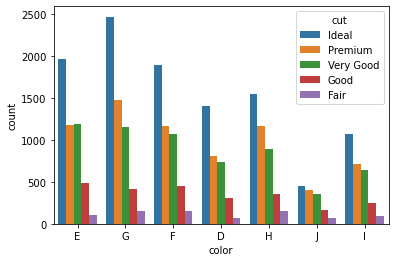

In [11]:
sns.countplot(gem_df['color'], hue = gem_df['cut'])

* Dataset contains G color with higher proportion then E, F, H, D, I & J in the order.
* Dataset contains Ideal cut with higher proportion against all the colors then Premium, Very Good, Good & Fair in the order.

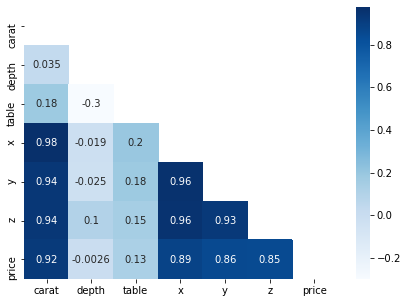

In [12]:
plt.figure(figsize=(7,5))
corr = gem_df.corr()
mask = np.triu(np.ones(corr.shape)).astype(np.bool)
sns.heatmap(corr, mask= mask, annot = True, cmap = 'Blues');

* carat-x, carat-y, carat-z, carat-price, x-y, x-z, x-price, y-z, y-price, z-price shows strong correlation.
* depth & table featue shows negative or very low correlation with other fetaures.

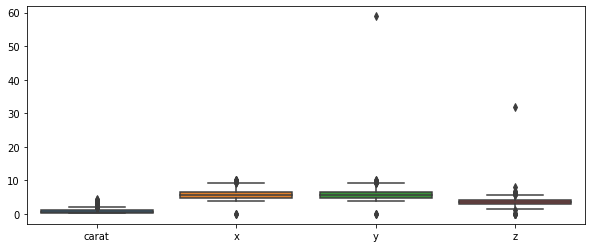

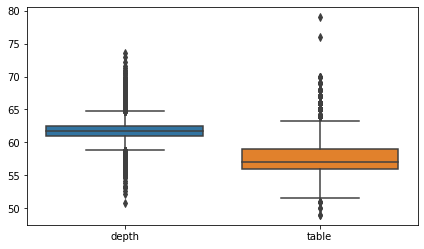

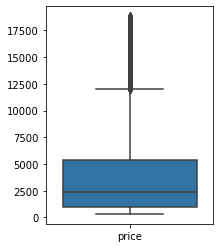

In [13]:
plt.figure(figsize = (10,4))
sns.boxplot(data = gem_df[['carat', 'x', 'y', 'z']]);
plt.figure(figsize = (7,4))
sns.boxplot(data = gem_df[['depth', 'table']]);
plt.figure(figsize = (3,4))
sns.boxplot(data = gem_df[['price']]);

All the features have outliers.

#### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [14]:
gem_df['depth'] = np.where(gem_df['depth'].isnull(), gem_df['depth'].median(), gem_df['depth'])

Replace the null value from the depth feature with the median.

In [15]:
gem_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [16]:
gem_df[gem_df['carat'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [17]:
gem_df[gem_df['depth'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [18]:
gem_df[gem_df['table'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [19]:
gem_df[gem_df['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [20]:
gem_df[gem_df['y'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [21]:
gem_df[gem_df['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [22]:
gem_df[gem_df['price'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


We could see 3 records with 0 value in x & y feature and 9 records with 0 value in z feature. x, y & z are Length, Width & Height respectively and by logic these parameters cannot be 0 so we need impute or drop the records befor proceeding further. Out of 26k+ records dropping 9 records maynot impact our model more. So, I am deciding to drops the records with 0 value.

In [23]:
gem_df.drop(gem_df[gem_df['z']==0].index, inplace = True)

In [24]:
gem_df.shape

(26958, 10)

In [25]:
gem_df.duplicated().sum()

33

There are 33 duplicate records which is not required for building the model so I decide to drop the duplicates.

In [26]:
gem_df.drop_duplicates(inplace = True)

In [27]:
gem_df.shape

(26925, 10)

It is not neccessary to scale the dataset as it will give same accuracy score even with or without scaling the dataset. The coefficients will change and the intercept will become zero or almost zero.

In [28]:
gem_df['y'].sort_values(ascending = False)

25795    58.90
12500    10.16
20505    10.10
8156      9.94
3025      9.94
         ...  
20093     3.77
10375     3.75
19108     3.72
5788      3.71
13051     3.71
Name: y, Length: 26925, dtype: float64

In [29]:
gem_df['z'].sort_values(ascending = False)

344      31.80
25795     8.06
12500     6.72
8156      6.31
12758     6.27
         ...  
12748     2.26
25498     2.24
26819     2.06
4828      1.53
21604     1.07
Name: z, Length: 26925, dtype: float64

In [30]:
gem_df['table'].sort_values(ascending = False)

4769     79.0
5067     76.0
10595    70.0
9617     70.0
9839     70.0
         ... 
13248    51.0
15336    50.1
6776     50.0
20736    49.0
6521     49.0
Name: table, Length: 26925, dtype: float64

* By looking at the Box plot of the y feature we could see 1 value which is very high (58.9) when compared to others so we need to impute that value to the next highest value (10.16) so that the outliers can be minimized.
* z feature have 1 value which is very high (31.8) when compared to others so we need to impute that value to the next highest value (8.06) so that the outliers can be minimized.

In [31]:
gem_df['y'] = np.where(gem_df['y'] == 58.9, 10.16, gem_df['y'])
gem_df['z'] = np.where(gem_df['z'] == 31.8, 8.06, gem_df['z'])

#### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [32]:
#encoding the values based on the cut fineness. Ideal being the max & Fair being the min.
gem_df['cut']=np.where(gem_df['cut'] =='Ideal', '5', gem_df['cut'])
gem_df['cut']=np.where(gem_df['cut'] =='Premium', '4', gem_df['cut'])
gem_df['cut']=np.where(gem_df['cut'] =='Very Good', '3', gem_df['cut'])
gem_df['cut']=np.where(gem_df['cut'] =='Good', '2', gem_df['cut'])
gem_df['cut']=np.where(gem_df['cut'] =='Fair', '1', gem_df['cut'])

In [33]:
#encoding the values based on the color. D being the max & J being the min.
gem_df['color']=np.where(gem_df['color'] =='D', '7', gem_df['color'])
gem_df['color']=np.where(gem_df['color'] =='E', '6', gem_df['color'])
gem_df['color']=np.where(gem_df['color'] =='F', '5', gem_df['color'])
gem_df['color']=np.where(gem_df['color'] =='G', '4', gem_df['color'])
gem_df['color']=np.where(gem_df['color'] =='H', '3', gem_df['color'])
gem_df['color']=np.where(gem_df['color'] =='I', '2', gem_df['color'])
gem_df['color']=np.where(gem_df['color'] =='J', '1', gem_df['color'])

In [34]:
#encoding the values based on the clarity. IF being the max & I1 being the min.
gem_df['clarity']=np.where(gem_df['clarity'] =='IF', '8', gem_df['clarity'])
gem_df['clarity']=np.where(gem_df['clarity'] =='VVS1', '7', gem_df['clarity'])
gem_df['clarity']=np.where(gem_df['clarity'] =='VVS2', '6', gem_df['clarity'])
gem_df['clarity']=np.where(gem_df['clarity'] =='VS1', '5', gem_df['clarity'])
gem_df['clarity']=np.where(gem_df['clarity'] =='VS2', '4', gem_df['clarity'])
gem_df['clarity']=np.where(gem_df['clarity'] =='SI1', '3', gem_df['clarity'])
gem_df['clarity']=np.where(gem_df['clarity'] =='SI2', '2', gem_df['clarity'])
gem_df['clarity']=np.where(gem_df['clarity'] =='I1', '1', gem_df['clarity'])

In [35]:
gem_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,6,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,5,7,60.4,59.0,4.35,4.43,2.65,779


In [36]:
#converting the object datatype to int
gem_df['cut'] = gem_df['cut'].astype('int64')
gem_df['color'] = gem_df['color'].astype('int64')
gem_df['clarity'] = gem_df['clarity'].astype('int64')

In [37]:
X = gem_df.drop('price', axis=1)
Y = gem_df[['price']]

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
#splitting the dataset for train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=0)

In [40]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [41]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11093.0193690914
The coefficient for cut is 121.83356080854696
The coefficient for color is 326.57094230426094
The coefficient for clarity is 483.93859405350577
The coefficient for depth is -7.520141735144346
The coefficient for table is -22.587520156461608
The coefficient for x is -1982.859954061855
The coefficient for y is 1777.1279645120956
The coefficient for z is -1274.0746854939061


In [42]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1345.6552997600843


In [43]:
regression_model.score(X_train, Y_train)

0.9088512946510081

In [44]:
regression_model.score(X_test, Y_test)

0.9098853182520431

We are at right fit zone since train set & test set scores are similar. R-Square that is accuracy for train set is 90.88% & for test set is 90.98%.

In [45]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [46]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11944,1.03,5,4,6,61.6,57.0,6.51,6.48,4.00,8020
2782,1.20,5,2,1,61.9,56.0,6.82,6.85,4.23,3505
7346,0.34,5,4,4,61.0,55.0,4.56,4.58,2.79,628
7511,0.70,2,3,4,59.7,57.0,5.75,5.80,3.45,2347
20965,0.54,5,4,5,61.6,56.0,5.24,5.28,3.24,1957


In [47]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    -1345.655300
carat        11093.019369
cut            121.833561
color          326.570942
clarity        483.938594
depth           -7.520142
table          -22.587520
x            -1982.859954
y             1777.127965
z            -1274.074685
dtype: float64

In [48]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Fri, 02 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:27:45   Log-Likelihood:            -1.6046e+05
No. Observations:               18847   AIC:                         3.209e+05
Df Residuals:                   18837   BIC:                         3.210e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1345.6553    966.691     -1.392      0.1

* R-Square & Adj. R-Square are same.
* coef represents the best fit line.
* Null Hypothesis: There is no relationship between price & the other independent attributes.
* If p-value < 0.05 then reject null hypothesis.
* p-value of depth feature is > 0.05 so we could say that depth feature is not the good predictor of the price feature.
* Apart from depth feature all other features has p-value < 0.05 so they are goods predictors of the price feature.

In [49]:
mse = np.mean((regression_model.predict(X_test)-Y_test)**2)

In [50]:
import math
math.sqrt(mse)

1225.7211083292063

RMSE is 1225.7 so there is avg of 1225 (roundoff) price difference from real price on an avg.

In [51]:
regression_model.score(X_test, Y_test)

0.9098853182520431

In [52]:
Y_pred = regression_model.predict(X_test)

Text(0, 0.5, 'Predicted Price')

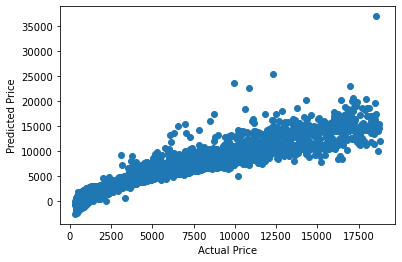

In [53]:
plt.scatter(Y_test['price'], Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

#### Comparison between Un-Regularized & Regularized models (Ridge & Lasso)

In [54]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

Y_scaled = preprocessing.scale(Y)
Y_scaled = pd.DataFrame(Y_scaled, columns=Y.columns)  # ideally the training and test should be 

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.30, random_state=0)

In [56]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.3161735403025077
The coefficient for cut is 0.03372713261205587
The coefficient for color is 0.13855916785016467
The coefficient for clarity is 0.1981758595844735
The coefficient for depth is -0.0026060769120399645
The coefficient for table is -0.012534284529358293
The coefficient for x is -0.5553020828769516
The coefficient for y is 0.49417250319349365
The coefficient for z is -0.22086418639793004


In [57]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.0007642620823890729


In [58]:
print(regression_model.score(X_train, Y_train))
print(regression_model.score(X_test, Y_test))

0.9088512946510081
0.9098853182520431


Accuracy score of Linear Regression Model on the train set without regularization is 90.89%.<br>
Accuracy score of Linear Regression Model on the test set without regularization is 90.99%.

#### Ridge

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
ridge.fit(X_train,Y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))

The coefficient for carat is 1.3154831869422372
The coefficient for cut is 0.0336920964573552
The coefficient for color is 0.1385474113895853
The coefficient for clarity is 0.19821369106830464
The coefficient for depth is -0.0026958515929190858
The coefficient for table is -0.012586931117208119
The coefficient for x is -0.549511372889635
The coefficient for y is 0.4883641374175352
The coefficient for z is -0.22015132312635088


In [60]:
print(ridge.score(X_train, Y_train))
print(ridge.score(X_test, Y_test))

0.9088511804297738
0.9098839519082659


Accuracy score of Linear Regression Model on the train set with Ridge regularization is 90.89%.<br>
Accuracy score of Linear Regression Model on the test set with Ridge regularization is 90.99%.

#### Lasso

In [61]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.83547536  0.          0.          0.04387255 -0.         -0.
  0.          0.          0.        ]


In [62]:
print(lasso.score(X_train, Y_train))
print(lasso.score(X_test, Y_test))

0.8542265621056048
0.8538142217004805


Accuracy score of Linear Regression Model on the train set with Lasso regularization is 85.42%.<br>
Accuracy score of Linear Regression Model on the test set with Lasso regularization is 85.38%.<br>
Here in the Lasso regularized model it has taken only 2 most useful features to predict the price and that is the reason for low accuracy score than the Ridge model.

In [63]:
index=['Accuracy Score of Train set', 'Accuracy Score of Test set']
data = pd.DataFrame({'Unregularized Model':[regression_model.score(X_train, Y_train), regression_model.score(X_test, Y_test)],
        'Ridge Regression':[ridge.score(X_train, Y_train), ridge.score(X_test, Y_test)],
       'Lasso Regression':[lasso.score(X_train, Y_train), lasso.score(X_test, Y_test)]},index=index)
round(data,2)

,Unregularized Model,Ridge Regression,Lasso Regression
Accuracy Score of Train set,0.91,0.91,0.85
Accuracy Score of Test set,0.91,0.91,0.85


#### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

* The dataset given do very well on the Linear Regression model.
* Accuracy score of Linear Regression Model on the train set without regularization is 90.89%. Accuracy score of Linear Regression Model on the test set without regularization is 90.99%.
* R-Square & Adj. R-Square are same, hence there is no standard fluke present in the R-Square.
* There is no relationship between depth & price feature based on the hypothesis testing so depth is not the predictor of the price.
* RMSE is 1225.7 so there is avg of 1225 (roundoff) price difference from real price on an avg.
* Accuracy score of Linear Regression Model on the train set with Ridge regularization is 90.89%. Accuracy score of Linear Regression Model on the test set with Ridge regularization is 90.99%.
* Accuracy score of Linear Regression Model on the train set with Lasso regularization is 85.42%. Accuracy score of Linear Regression Model on the test set with Lasso regularization is 85.38%. However Lasso model considers only 2 attributes(carat & clarity) to build model and gives result accuracy as 85%. This method is very much useful in case of curse of dimensionality.
* Top 5 attributes that are more important are carat, x (Length of the cubic zirconia), y (Width of the cubic zirconia), z (Height of the cubic zirconia) & clarity.

### Problem 2: Logistic Regression and LDA
#### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [65]:
holiday_df = pd.read_csv('Holiday_Package.csv')

In [66]:
holiday_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [67]:
holiday_df = holiday_df.drop(holiday_df.columns[0], axis = 1)

In [68]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


Dataset contains 7 features. 5 features with int datatype and 2 with object datatype. There are no null values present.

In [69]:
holiday_df.shape

(872, 7)

In [70]:
holiday_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Mean & Median of Salary feature are bit spreaded so we can expect some skewness in the distribution.
* For the age & educ feature the mean & median are almost equal and it could be normallity distributed.
* By looking at the no_young_children feature we can see that atleast 75% of the data is 0 meaning atleast 75% of the employess dont have young children at their home.
* By looking at the no_older_children feature we can see that atleast 50% of the employees have atleast 1 older child at their home and the max childern is 6.
* There are 2 unique values present in the Holliday_Package and foreign feature. 471 employess opted no for the Holliday_Package and 656 employess are not foreigner.

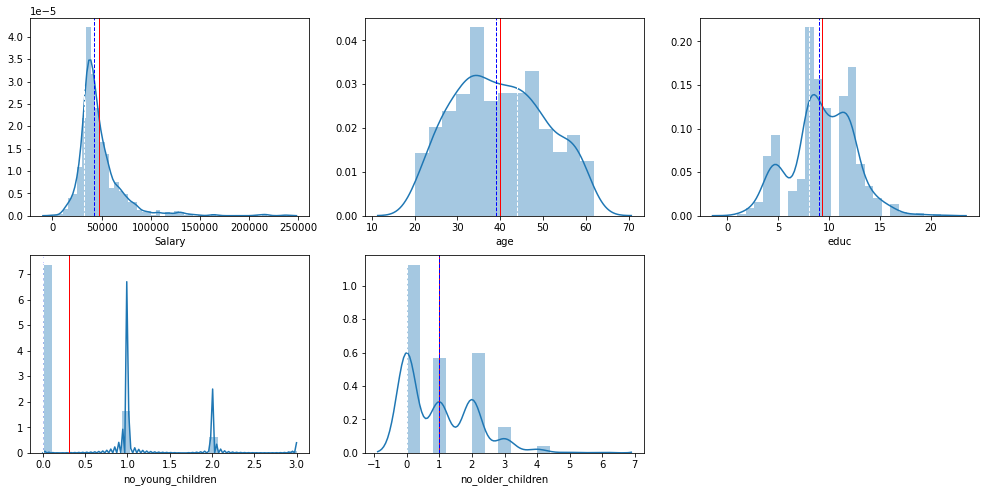

In [71]:
plt.figure(figsize = (17,8))
plt.subplot(2,3,1)
sns.distplot(holiday_df['Salary'])
plt.axvline(holiday_df['Salary'].mean(), color='red', linewidth=1)
plt.axvline(holiday_df['Salary'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(holiday_df['Salary'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,3,2)
sns.distplot(holiday_df['age'])
plt.axvline(holiday_df['age'].mean(), color='red', linewidth=1)
plt.axvline(holiday_df['age'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(holiday_df['age'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,3,3)
sns.distplot(holiday_df['educ'])
plt.axvline(holiday_df['educ'].mean(), color='red', linewidth=1)
plt.axvline(holiday_df['educ'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(holiday_df['educ'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,3,4)
sns.distplot(holiday_df['no_young_children'])
plt.axvline(holiday_df['no_young_children'].mean(), color='red', linewidth=1)
plt.axvline(holiday_df['no_young_children'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(holiday_df['no_young_children'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,3,5)
sns.distplot(holiday_df['no_older_children'])
plt.axvline(holiday_df['no_older_children'].mean(), color='red', linewidth=1)
plt.axvline(holiday_df['no_older_children'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(holiday_df['no_older_children'].mode()[0], color='white', linestyle='dashed', linewidth=1);

* Feature age looks like normal distribution but it have multiple small peaks.
* Feature Salary is right skewed, meaning employees with salary greater than 80k are very little.
* Features educ, no_young_children & no_older_children are having multiple peaks in their distribution.
* Features no_young_children & no_older_children showing max count at 0.
* Since it is EDA, all these inferences are just visual interpretation by looking at the distribution plot but the skewness & normality can be computed in other ways.

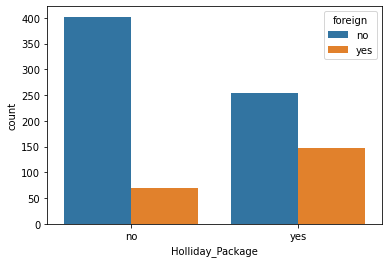

In [72]:
sns.countplot(holiday_df['Holliday_Package'], hue = holiday_df['foreign'])

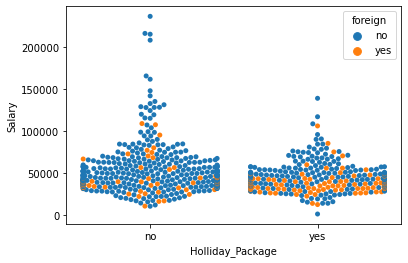

In [73]:
sns.swarmplot(holiday_df['Holliday_Package'], holiday_df['Salary'], hue = holiday_df['foreign'])

* By looking at the above count plot we can infer that around 250 employees who were opted for hoilday package were non-foreigner & close to 150 employees were foreigner.
* Almost 400 employees who were not opted for holiday package are non-foreigner & more than 50 employees were foreigner.
* So we infer that foreigners opt for holiday package more rater than not opting.
* Employees with Salary 30000 to 70000 opt more for the holiday package and also foreigner opt more.

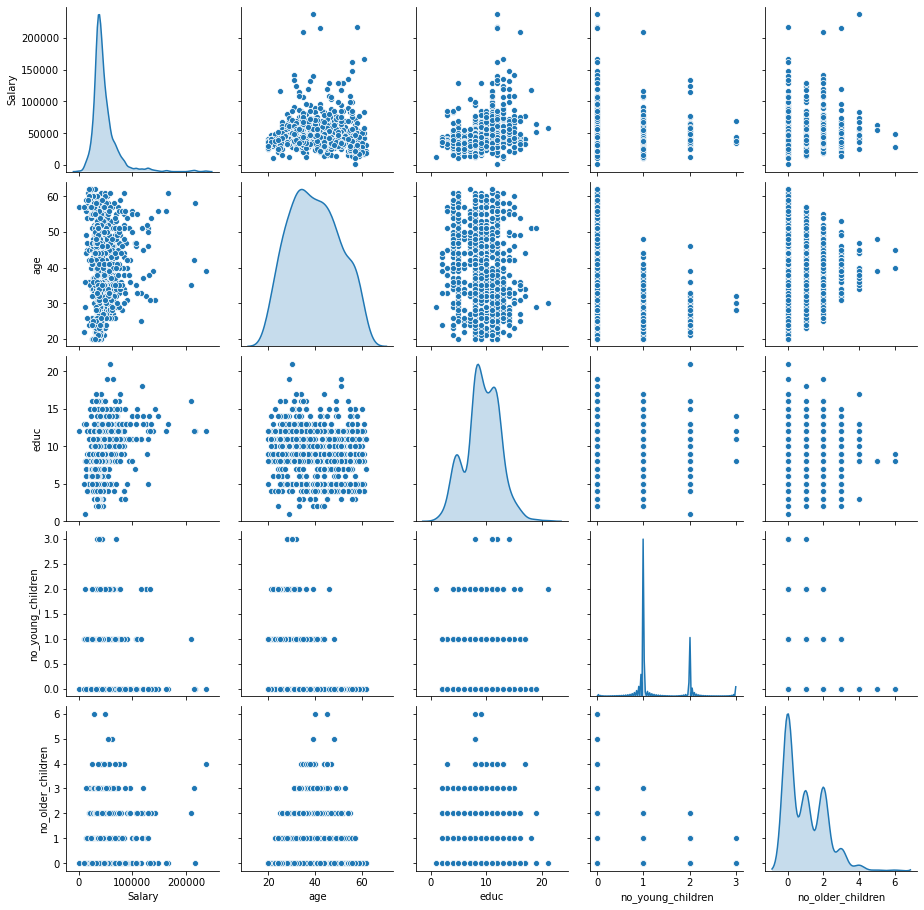

In [74]:
sns.pairplot(holiday_df, diag_kind = 'kde');

* There are not linearity present in the data set.
* Correlation can be better visualized using heatmap.

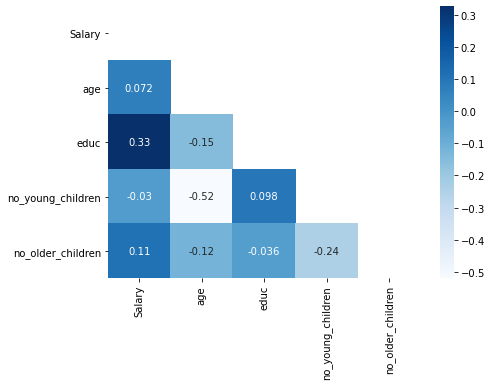

In [75]:
plt.figure(figsize=(7,5))
corr = holiday_df.corr()
mask = np.triu(np.ones(corr.shape)).astype(np.bool)
sns.heatmap(corr, mask= mask, annot = True, cmap = 'Blues');

* Almost all the features shows very week correlation.

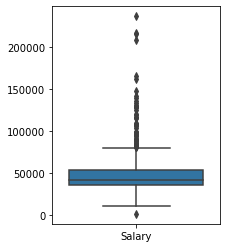

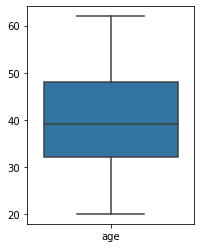

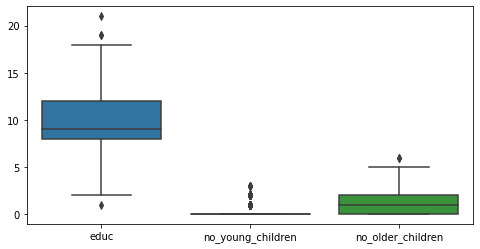

In [76]:
plt.figure(figsize = (3,4))
sns.boxplot(data = holiday_df[['Salary']]);
plt.figure(figsize = (3,4))
sns.boxplot(data = holiday_df[['age']]);
plt.figure(figsize = (8,4))
sns.boxplot(data = holiday_df[['educ', 'no_young_children', 'no_older_children']]);

* Except age feature all other features have outliers and treating the outliers is not necessary as all the data seems valid.

In [77]:
holiday_df.groupby(["Holliday_Package"]).count()

,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,
no,471,471,471,471,471,471
yes,401,401,401,401,401,401


Given dataset is very well balanced.

#### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [78]:
holiday_df['Holliday_Package']=np.where(holiday_df['Holliday_Package'] =='yes', '1', 0)
holiday_df['foreign']=np.where(holiday_df['foreign'] =='yes', '1', 0)

In [79]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [80]:
holiday_df['Holliday_Package']=holiday_df['Holliday_Package'].astype('int64')
holiday_df['foreign']=holiday_df['foreign'].astype('int64')

In [81]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int64
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int64
dtypes: int64(7)
memory usage: 47.8 KB


In [82]:
holiday_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


#### Train & Test Split

In [83]:
# Copy all the predictor variables into X dataframe
X = holiday_df.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
Y = holiday_df['Holliday_Package']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=0)

In [86]:
Y_train.value_counts(1)

0    0.563934
1    0.436066
Name: Holliday_Package, dtype: float64

In [87]:
Y_test.value_counts(1)

1    0.515267
0    0.484733
Name: Holliday_Package, dtype: float64

#### Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
# solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}
model_LR = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2, random_state = 0)
model_LR.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

#### Linear Discriminant Analysis

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [91]:
clf = LinearDiscriminantAnalysis(solver = 'svd')
model_LDA=clf.fit(X_train,Y_train)
model_LDA

LinearDiscriminantAnalysis()

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

#### Predicting on Training and Test dataset - Logistic Regression

In [92]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [93]:
ytrain_predict = model_LR.predict(X_train)
ytest_predict = model_LR.predict(X_test)

In [94]:
ytest_predict_prob=model_LR.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.825673,0.174327
1,0.696984,0.303016
2,0.516131,0.483869
3,0.634624,0.365376
4,0.738177,0.261823


In [95]:
LR_train_acc = model_LR.score(X_train, Y_train)
LR_train_acc

0.6836065573770492

AUC: 0.742


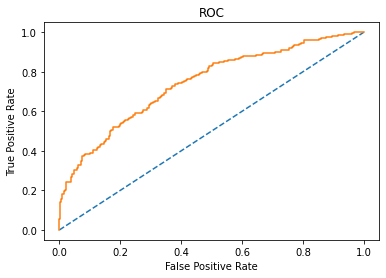

In [96]:
# predict probabilities
probs = model_LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % LR_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

In [97]:
# Accuracy - Test Data
LR_test_acc = model_LR.score(X_test, Y_test)
LR_test_acc

0.6259541984732825

AUC: 0.706


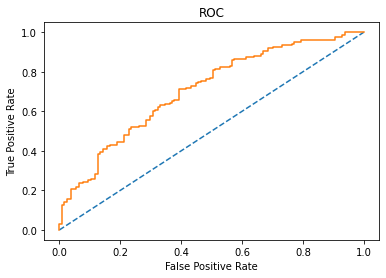

In [98]:
# predict probabilities
probs = model_LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LR_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % LR_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

In [99]:
confusion_matrix(Y_train, ytrain_predict)

array([[277,  67],
       [126, 140]], dtype=int64)

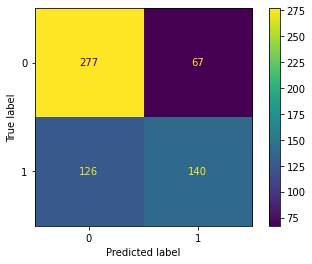

In [100]:
plot_confusion_matrix(model_LR,X_train,Y_train);

In [101]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.53      0.59       266

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



In [102]:
LR_metrics=classification_report(Y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_train_precision=round(df.loc["1"][0],2)
LR_train_recall=round(df.loc["1"][1],2)
LR_train_f1=round(df.loc["1"][2],2)


In [103]:
confusion_matrix(Y_test, ytest_predict)

array([[100,  27],
       [ 71,  64]], dtype=int64)

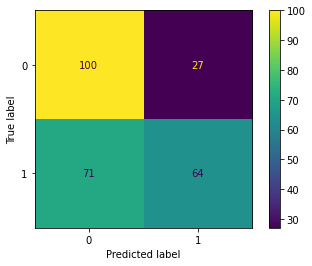

In [104]:
plot_confusion_matrix(model_LR,X_test,Y_test);

In [105]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.58      0.79      0.67       127
           1       0.70      0.47      0.57       135

    accuracy                           0.63       262
   macro avg       0.64      0.63      0.62       262
weighted avg       0.65      0.63      0.62       262



In [106]:
LR_metrics=classification_report(Y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(LR_metrics).transpose()
LR_test_precision=round(df.loc["1"][0],2)
LR_test_recall=round(df.loc["1"][1],2)
LR_test_f1=round(df.loc["1"][2],2)

#### Predicting on Training and Test dataset - LDA

In [107]:
ytrain_pred_class = model_LDA.predict(X_train)
ytest_pred_class = model_LDA.predict(X_test)
#holiday_df['Prediction'] = pred_class

In [108]:
ytest_pred_class_prob=model_LDA.predict_proba(X_test)
pd.DataFrame(ytest_pred_class_prob).head()

,0,1
0,0.792632,0.207368
1,0.656473,0.343527
2,0.534789,0.465211
3,0.653121,0.346879
4,0.758785,0.241215


In [109]:
LDA_train_acc = model_LDA.score(X_train, Y_train)
LDA_train_acc

0.6836065573770492

AUC: 0.740


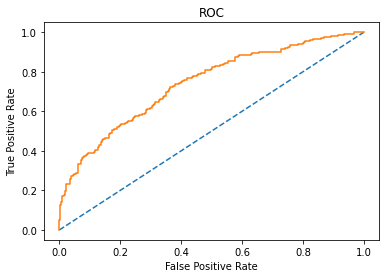

In [110]:
# predict probabilities
probs = model_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

In [111]:
LDA_test_acc = model_LDA.score(X_test, Y_test)
LDA_test_acc

0.6145038167938931

AUC: 0.701


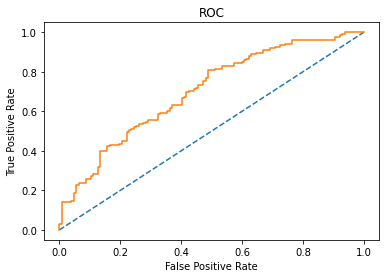

In [112]:
probs = model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

In [113]:
confusion_matrix(Y_train, ytrain_pred_class)

array([[279,  65],
       [128, 138]], dtype=int64)

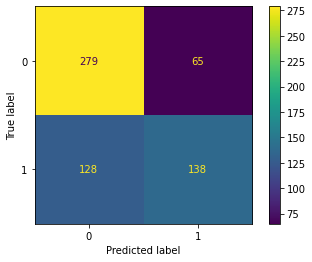

In [114]:
plot_confusion_matrix(model_LDA,X_train,Y_train);

In [115]:
print(classification_report(Y_train, ytrain_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       344
           1       0.68      0.52      0.59       266

    accuracy                           0.68       610
   macro avg       0.68      0.66      0.67       610
weighted avg       0.68      0.68      0.68       610



In [116]:
LDA_metrics=classification_report(Y_train,ytrain_pred_class,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_precision=round(df.loc["1"][0],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_f1=round(df.loc["1"][2],2)

In [117]:
confusion_matrix(Y_test, ytest_pred_class)

array([[102,  25],
       [ 76,  59]], dtype=int64)

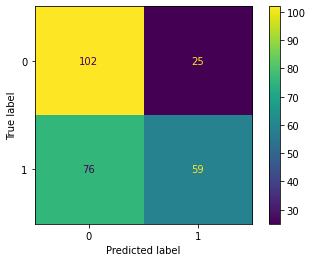

In [118]:
plot_confusion_matrix(model_LDA,X_test,Y_test);

In [119]:
print(classification_report(Y_test, ytest_pred_class))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       127
           1       0.70      0.44      0.54       135

    accuracy                           0.61       262
   macro avg       0.64      0.62      0.60       262
weighted avg       0.64      0.61      0.60       262



In [120]:
LDA_metrics=classification_report(Y_test,ytest_pred_class,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][0],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_f1=round(df.loc["1"][2],2)

In [121]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LogisticRegression Train':[LR_train_acc,LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
        'LogisticRegression Test':[LR_test_acc,LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1]},index=index)
round(data,2)

,LogisticRegression Train,LogisticRegression Test,LDA Train,LDA Test
Accuracy,0.68,0.63,0.68,0.61
AUC,0.74,0.71,0.74,0.70
Recall,0.53,0.47,0.52,0.44
Precision,0.68,0.70,0.68,0.70
F1 Score,0.59,0.57,0.59,0.54


* Both the Logistic Regression & Linear Discriminant Analysis model gives almost similar results.
* However Logistic Regression model is slightly better than LDA model so we conclude Logistic Regression model is the best optimized model.

#### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

* Firstly the dataset given for this model building is very well balanced.
* Logistic Regression model shows better score on all the metrics - Accuracy, AUC, Recall, Precision & F1 score.
* The recall value for both the models are less than 50% and we can try to build other models like Decision Tree, Random Forest or Neural Network etc to check whether they can give better result than Logistic Regression & LDA models.
* However for this problem we need to predict how many employees will opt for this holiday package so the precision score is 70% for the test data which is good.
* Employees with Salary 30000 to 60000 opt more for the holiday package and also foreigner opt more.
* So the travel agency should focus more on the packages for non-foreigner by promoting, discounts etc.
* Also employees with high salary show less interest on this tour package so the travel agency need to frame a premium package which will suit for especially for the employees with high salary.